**GENETİK ALGORİTMA İLE RESİM ÇİZME**

İstenirse Hazır genetik algoritma aşağıdaki hücre ile test edilebilir, biz kendimiz yazacağız tabii

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!pip install geneticalgorithm
from geneticalgorithm import geneticalgorithm as ga
import matplotlib.image as mpimg

def create_circle_points(num_points):
    circle_points = []
    for i in range(num_points):
        angle = 2 * np.pi * i / num_points
        x = np.cos(angle)
        y = np.sin(angle)
        circle_points.append((x, y))
    return circle_points

def draw_image(circle_points, sequence):
    image = np.zeros((100, 100))  # 100x100 boyutunda bir resim oluştur
    for i in range(len(sequence) - 1):
        start_point = circle_points[sequence[i] - 1]
        end_point = circle_points[sequence[i + 1] - 1]
        x0, y0 = start_point
        x1, y1 = end_point
        x_values = np.linspace(x0, x1, 100)
        y_values = np.linspace(y0, y1, 100)
        for x, y in zip(x_values, y_values):
            x_index = int((x + 1) * (image.shape[1] - 1) / 2)
            y_index = int((y + 1) * (image.shape[0] - 1) / 2)
            image[y_index, x_index] = 1
    return image

def similarity_score(original_image, generated_image):
    return np.sum(original_image == generated_image) / original_image.size

def load_original_image(file_path):
    original_image = mpimg.imread(file_path)
    # Siyah-beyaz resme dönüştürme
    original_image = np.mean(original_image, axis=2)
    # İsteğe bağlı olarak resmi yeniden boyutlandırma veya işleme yapma
    # original_image = some_processing(original_image)
    return original_image

# Siyah-beyaz resmi oluştur
def create_black_white_image():
    image = np.zeros((100, 100))
    center = (50, 50)
    radius = 40
    for i in range(100):
        for j in range(100):
            if (i - center[0])**2 + (j - center[1])**2 <= radius**2:
                image[i, j] = 1
    return image

def optimize_image(sequence_length, original_image):
    circle_points = create_circle_points(360)
    objective_function = lambda x: -similarity_score(original_image, draw_image(circle_points, x.astype(int)))
    varbound = np.array([[1, 360]] * sequence_length)
    model = ga(function=objective_function, dimension=sequence_length, variable_type='int', variable_boundaries=varbound)
    model.run()
    optimized_sequence = model.output_dict['variable']
    return optimized_sequence.astype(int)

# Orijinal resmi yükleme
original_image = create_black_white_image()

# Çözüm uzunluğu
sequence_length = 100

# Resmi optimize etme
optimized_sequence = optimize_image(sequence_length, original_image)
optimized_image = draw_image(create_circle_points(360), optimized_sequence)

# Benzerlik skorunu hesaplama
similarity = similarity_score(original_image, optimized_image)

# Sonuçları görselleştirme
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title('Orijinal Resim')
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Optimize Edilmiş Resim\nBenzerlik Skoru: {:.2f}'.format(similarity))
plt.imshow(optimized_image, cmap='gray')
plt.axis('off')

plt.show()


## Genetik Algoritma Parametreleri
population_size = 100
num_generations = 100
num_parents = 20
mutation_rate = 0.1

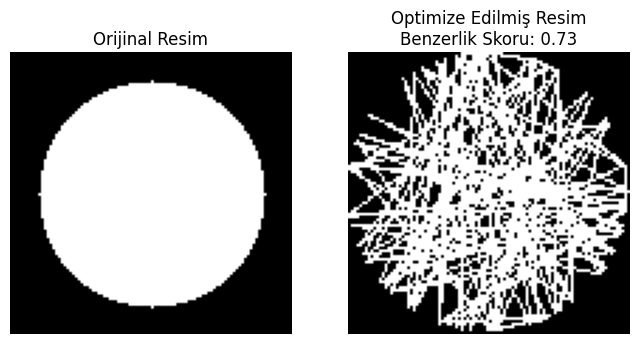

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_circle_points(num_points):
    """
    Bir çember üzerinde belirli sayıda nokta oluşturur.
    """
    circle_points = []
    for i in range(num_points):
        angle = 2 * np.pi * i / num_points
        x = np.cos(angle)
        y = np.sin(angle)
        circle_points.append((x, y))
    return circle_points

def draw_image(circle_points, sequence):
    """
    Verilen bir dizi noktalar arasında çizgi çekerek bir resim oluşturur.
    """
    image = np.zeros((100, 100))  # 100x100 boyutunda siyah bir resim oluştur
    for i in range(len(sequence) - 1):
        start_point = circle_points[sequence[i] - 1]
        end_point = circle_points[sequence[i + 1] - 1]
        x0, y0 = start_point
        x1, y1 = end_point
        x_values = np.linspace(x0, x1, 100)
        y_values = np.linspace(y0, y1, 100)
        for x, y in zip(x_values, y_values):
            x_index = int((x + 1) * (image.shape[1] - 1) / 2)
            y_index = int((y + 1) * (image.shape[0] - 1) / 2)
            image[y_index, x_index] = 1
    return image

def similarity_score(original_image, generated_image):
    """
    İki resim arasındaki benzerliği hesaplar.
    """
    return np.sum(original_image == generated_image) / original_image.size

# Genetik Algoritma Fonksiyonlarını Tanımlama
def initialize_population(population_size, sequence_length):
    """
    Başlangıç popülasyonunu rastgele oluşturur.
    """
    return np.random.randint(1, 361, size=(population_size, sequence_length))

def evaluate_population(population, circle_points, original_image):
    """
    Popülasyonun uygunluk değerlerini hesaplar.
    """
    scores = []
    for individual in population:
        image = draw_image(circle_points, individual)
        score = similarity_score(original_image, image)
        scores.append(score)
    return np.array(scores)

def select_parents(population, scores, num_parents):
    """
    Ebeveynleri seçer.
    """
    parents_indices = np.argsort(scores)[-num_parents:]
    return population[parents_indices]

def crossover(parents, offspring_size):
    """
    Çaprazlama işlemi gerçekleştirir.
    """
    offspring = np.empty(offspring_size)
    crossover_point = np.random.randint(1, offspring_size[1])
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k+1) % parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutate(offspring_crossover, mutation_rate):
    """
    Mutasyon işlemi gerçekleştirir.
    """
    for idx in range(offspring_crossover.shape[0]):
        for gene in range(offspring_crossover.shape[1]):
            if np.random.uniform(0, 1) < mutation_rate:
                offspring_crossover[idx, gene] = np.random.randint(1, 361)
    return offspring_crossover

def genetic_algorithm(population_size, sequence_length, circle_points, original_image, num_generations, num_parents, mutation_rate):
    """
    Genetik algoritmayı uygular ve en iyi çözümü döndürür.
    """
    population = initialize_population(population_size, sequence_length)
    for generation in range(num_generations):
        scores = evaluate_population(population, circle_points, original_image)
        parents = select_parents(population, scores, num_parents)
        offspring_crossover = crossover(parents, offspring_size=(population_size-num_parents, sequence_length))
        offspring_mutation = mutate(offspring_crossover, mutation_rate)
        population[0:num_parents, :] = parents
        population[num_parents:, :] = offspring_mutation
    final_scores = evaluate_population(population, circle_points, original_image)
    best_individual = population[np.argmax(final_scores)]
    return best_individual

# Orijinal Resmi Yükleme ve Siyah-Beyaz Dönüşümü
def create_black_white_image():
    """
    Siyah bir zemin üzerine beyaz bir daire çizerek bir siyah-beyaz resim oluşturur.
    """
    image = np.zeros((100, 100))
    center = (50, 50)
    radius = 40
    for i in range(100):
        for j in range(100):
            if (i - center[0])**2 + (j - center[1])**2 <= radius**2:
                image[i, j] = 1
    return image

# Orijinal resmi oluştur
original_image = create_black_white_image()

# Çözüm uzunluğu
sequence_length = 100

# Genetik Algoritmayı Çalıştırma ve Sonuçları Görselleştirme
# Genetik Algoritma Parametreleri
population_size = 100
num_generations = 100
num_parents = 20
mutation_rate = 0.1

# Çember noktalarını oluştur
circle_points = create_circle_points(360)

# Genetik Algoritmayı Çalıştırma
best_individual = genetic_algorithm(population_size, sequence_length, circle_points, original_image, num_generations, num_parents, mutation_rate)

# En İyi Çözümü Kullanarak Optimize Edilmiş Resmi Oluşturma
optimized_image = draw_image(circle_points, best_individual)

# Benzerlik Skorunu Hesaplama
similarity = similarity_score(original_image, optimized_image)

# Sonuçları Görselleştirme
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Orijinal Resim')
plt.imshow(original_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Optimize Edilmiş Resim\nBenzerlik Skoru: {:.2f}'.format(similarity))
plt.imshow(optimized_image, cmap='gray')
plt.axis('off')
plt.show()


Her 10 jenerasyonda bir, en iyi çözümün ve onun benzerlik skorunun görselleştirilmesi

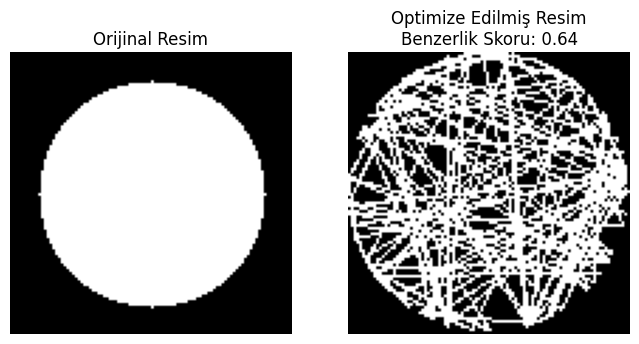

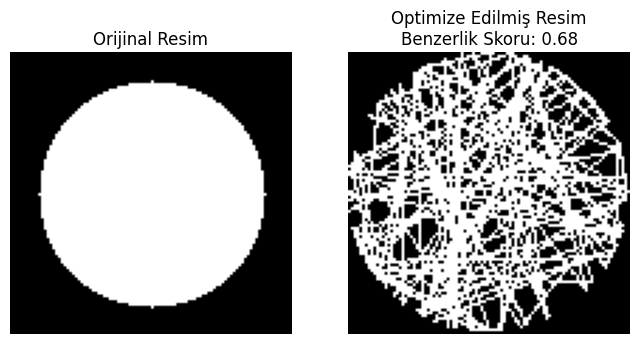

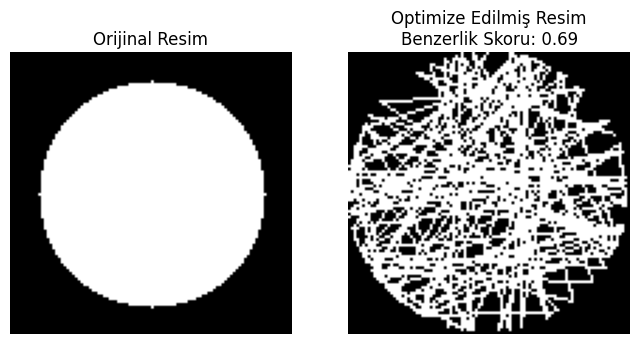

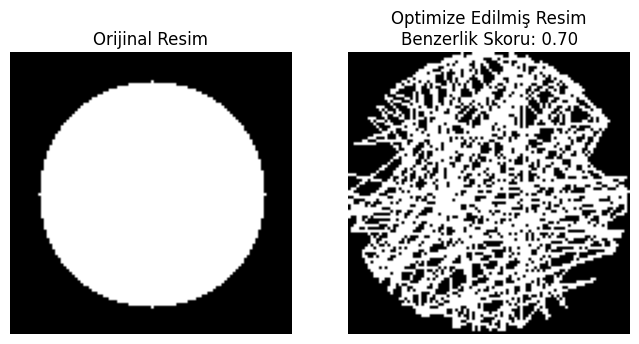

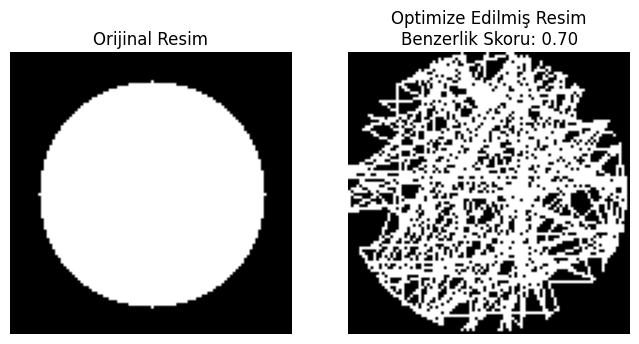

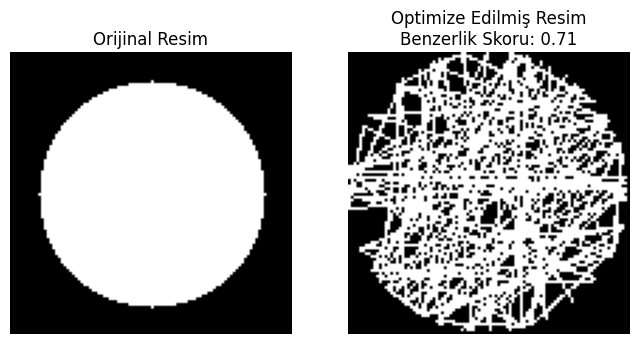

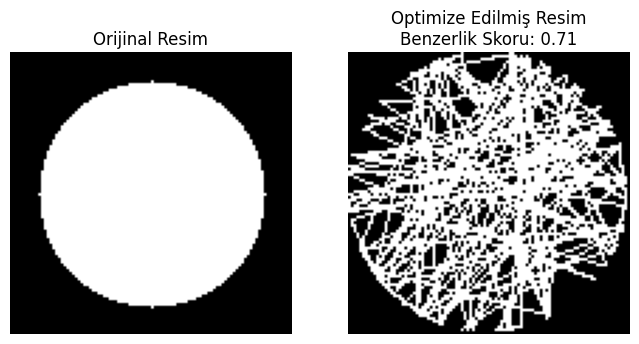

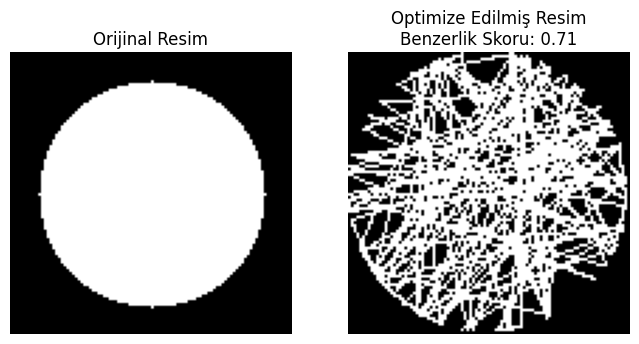

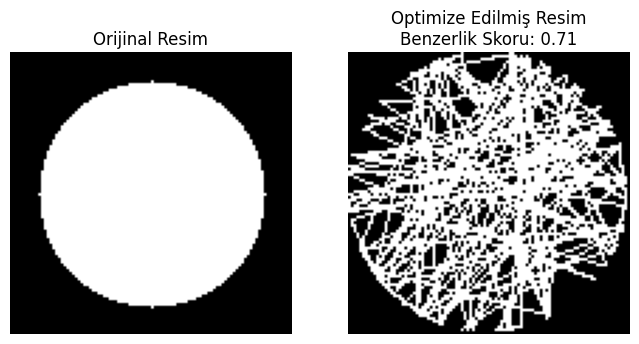

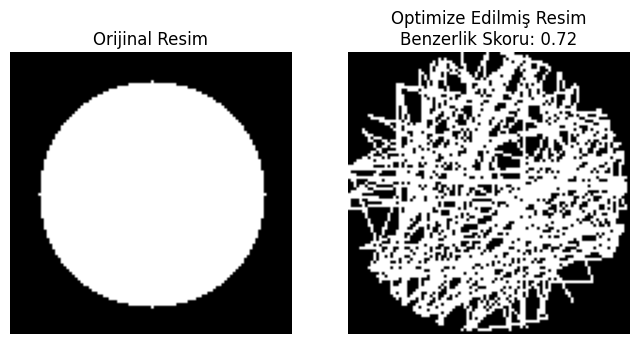

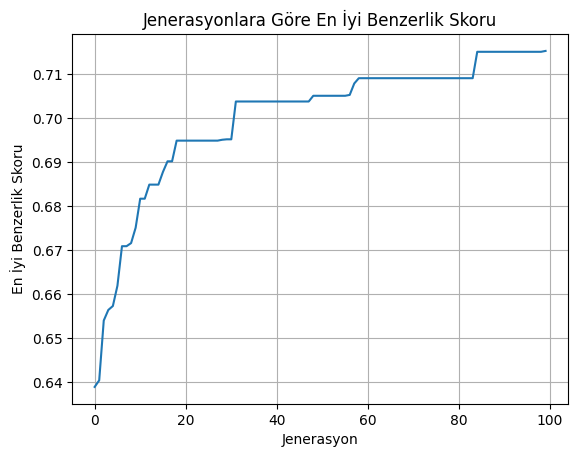

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_circle_points(num_points):
    """
    Bir çember üzerinde belirli sayıda nokta oluşturur.
    """
    circle_points = []
    for i in range(num_points):
        angle = 2 * np.pi * i / num_points
        x = np.cos(angle)
        y = np.sin(angle)
        circle_points.append((x, y))
    return circle_points

def draw_image(circle_points, sequence):
    """
    Verilen bir dizi noktalar arasında çizgi çekerek bir resim oluşturur.
    """
    image = np.zeros((100, 100))  # 100x100 boyutunda siyah bir resim oluştur
    for i in range(len(sequence) - 1):
        start_point = circle_points[sequence[i] - 1]
        end_point = circle_points[sequence[i + 1] - 1]
        x0, y0 = start_point
        x1, y1 = end_point
        x_values = np.linspace(x0, x1, 100)
        y_values = np.linspace(y0, y1, 100)
        for x, y in zip(x_values, y_values):
            x_index = int((x + 1) * (image.shape[1] - 1) / 2)
            y_index = int((y + 1) * (image.shape[0] - 1) / 2)
            image[y_index, x_index] = 1
    return image

def similarity_score(original_image, generated_image):
    """
    İki resim arasındaki benzerliği hesaplar.
    """
    return np.sum(original_image == generated_image) / original_image.size

# Genetik Algoritma Fonksiyonlarını Tanımlama
def initialize_population(population_size, sequence_length):
    """
    Başlangıç popülasyonunu rastgele oluşturur.
    """
    return np.random.randint(1, 361, size=(population_size, sequence_length))

def evaluate_population(population, circle_points, original_image):
    """
    Popülasyonun uygunluk değerlerini hesaplar.
    """
    scores = []
    for individual in population:
        image = draw_image(circle_points, individual)
        score = similarity_score(original_image, image)
        scores.append(score)
    return np.array(scores)

def select_parents(population, scores, num_parents):
    """
    Ebeveynleri seçer.
    """
    parents_indices = np.argsort(scores)[-num_parents:]
    return population[parents_indices]

def crossover(parents, offspring_size):
    """
    Çaprazlama işlemi gerçekleştirir.
    """
    offspring = np.empty(offspring_size)
    crossover_point = np.random.randint(1, offspring_size[1])
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k+1) % parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutate(offspring_crossover, mutation_rate):
    """
    Mutasyon işlemi gerçekleştirir.
    """
    for idx in range(offspring_crossover.shape[0]):
        for gene in range(offspring_crossover.shape[1]):
            if np.random.uniform(0, 1) < mutation_rate:
                offspring_crossover[idx, gene] = np.random.randint(1, 361)
    return offspring_crossover

def genetic_algorithm(population_size, sequence_length, circle_points, original_image, num_generations, num_parents, mutation_rate):
    """
    Genetik algoritmayı uygular ve her jenerasyonda en iyi benzerlik puanını döndürür.
    """
    population = initialize_population(population_size, sequence_length)
    best_similarity_scores = []
    for generation in range(num_generations):
        scores = evaluate_population(population, circle_points, original_image)
        parents = select_parents(population, scores, num_parents)
        offspring_crossover = crossover(parents, offspring_size=(population_size-num_parents, sequence_length))
        offspring_mutation = mutate(offspring_crossover, mutation_rate)
        population[0:num_parents, :] = parents
        population[num_parents:, :] = offspring_mutation
        final_scores = evaluate_population(population, circle_points, original_image)
        best_similarity_score = np.max(final_scores)
        best_similarity_scores.append(best_similarity_score)
        if generation % 10 == 0:  # Her 10 jenerasyon sonra sonucu görselleştirme
            best_individual = population[np.argmax(final_scores)]
            optimized_image = draw_image(circle_points, best_individual)
            plt.figure(figsize=(8, 4))
            plt.subplot(1, 2, 1)
            plt.title('Orijinal Resim')
            plt.imshow(original_image, cmap='gray')
            plt.axis('off')
            plt.subplot(1, 2, 2)
            plt.title('Optimize Edilmiş Resim\nBenzerlik Skoru: {:.2f}'.format(best_similarity_score))
            plt.imshow(optimized_image, cmap='gray')
            plt.axis('off')
            plt.show()
    return best_similarity_scores

# Orijinal Resmi Yükleme ve Siyah-Beyaz Dönüşümü
def create_black_white_image():
    """
    Siyah bir zemin üzerine beyaz bir daire çizerek bir siyah-beyaz resim oluşturur.
    """
    image = np.zeros((100, 100))
    center = (50, 50)
    radius = 40
    for i in range(100):
        for j in range(100):
            if (i - center[0])**2 + (j - center[1])**2 <= radius**2:
                image[i, j] = 1
    return image

# Orijinal resmi oluştur
original_image = create_black_white_image()

# Çözüm uzunluğu
sequence_length = 100

# Genetik Algoritmayı Çalıştırma ve Sonuçları Görselleştirme
# Genetik Algoritma Parametreleri
population_size = 100
num_generations = 100
num_parents = 20
mutation_rate = 0.1

# Çember noktalarını oluştur
circle_points = create_circle_points(360)

# Genetik Algoritmayı Çalıştırma
best_similarity_scores = genetic_algorithm(population_size, sequence_length, circle_points, original_image, num_generations, num_parents, mutation_rate)

# Benzerlik Skorlarını Görselleştirme
plt.plot(range(num_generations), best_similarity_scores)
plt.xlabel('Jenerasyon')
plt.ylabel('En İyi Benzerlik Skoru')
plt.title('Jenerasyonlara Göre En İyi Benzerlik Skoru')
plt.grid(True)
plt.show()

# Genetik Algoritma Parametreleri
population_size = 500
num_generations = 100
num_parents = 20
mutation_rate = 0.02

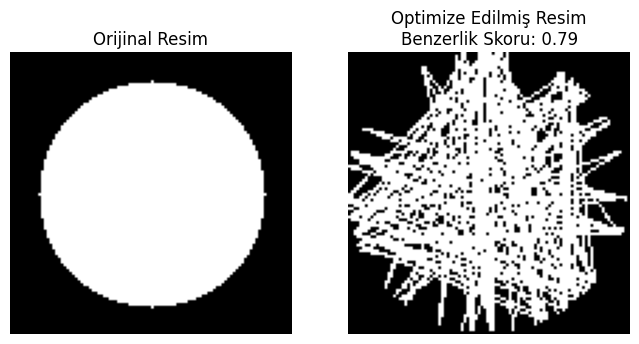

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_circle_points(num_points):
    """
    Bir çember üzerinde belirli sayıda nokta oluşturur.
    """
    circle_points = []
    for i in range(num_points):
        angle = 2 * np.pi * i / num_points
        x = np.cos(angle)
        y = np.sin(angle)
        circle_points.append((x, y))
    return circle_points

def draw_image(circle_points, sequence):
    """
    Verilen bir dizi noktalar arasında çizgi çekerek bir resim oluşturur.
    """
    image = np.zeros((100, 100))  # 100x100 boyutunda siyah bir resim oluştur
    for i in range(len(sequence) - 1):
        start_point = circle_points[sequence[i] - 1]
        end_point = circle_points[sequence[i + 1] - 1]
        x0, y0 = start_point
        x1, y1 = end_point
        x_values = np.linspace(x0, x1, 100)
        y_values = np.linspace(y0, y1, 100)
        for x, y in zip(x_values, y_values):
            x_index = int((x + 1) * (image.shape[1] - 1) / 2)
            y_index = int((y + 1) * (image.shape[0] - 1) / 2)
            image[y_index, x_index] = 1
    return image

def similarity_score(original_image, generated_image):
    """
    İki resim arasındaki benzerliği hesaplar.
    """
    return np.sum(original_image == generated_image) / original_image.size

# Genetik Algoritma Fonksiyonlarını Tanımlama
def initialize_population(population_size, sequence_length):
    """
    Başlangıç popülasyonunu rastgele oluşturur.
    """
    return np.random.randint(1, 361, size=(population_size, sequence_length))

def evaluate_population(population, circle_points, original_image):
    """
    Popülasyonun uygunluk değerlerini hesaplar.
    """
    scores = []
    for individual in population:
        image = draw_image(circle_points, individual)
        score = similarity_score(original_image, image)
        scores.append(score)
    return np.array(scores)

def select_parents(population, scores, num_parents):
    """
    Ebeveynleri seçer.
    """
    parents_indices = np.argsort(scores)[-num_parents:]
    return population[parents_indices]

def crossover(parents, offspring_size):
    """
    Çaprazlama işlemi gerçekleştirir.
    """
    offspring = np.empty(offspring_size)
    crossover_point = np.random.randint(1, offspring_size[1])
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k+1) % parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutate(offspring_crossover, mutation_rate):
    """
    Mutasyon işlemi gerçekleştirir.
    """
    for idx in range(offspring_crossover.shape[0]):
        for gene in range(offspring_crossover.shape[1]):
            if np.random.uniform(0, 1) < mutation_rate:
                offspring_crossover[idx, gene] = np.random.randint(1, 361)
    return offspring_crossover

def genetic_algorithm(population_size, sequence_length, circle_points, original_image, num_generations, num_parents, mutation_rate):
    """
    Genetik algoritmayı uygular ve en iyi çözümü döndürür.
    """
    population = initialize_population(population_size, sequence_length)
    for generation in range(num_generations):
        scores = evaluate_population(population, circle_points, original_image)
        parents = select_parents(population, scores, num_parents)
        offspring_crossover = crossover(parents, offspring_size=(population_size-num_parents, sequence_length))
        offspring_mutation = mutate(offspring_crossover, mutation_rate)
        population[0:num_parents, :] = parents
        population[num_parents:, :] = offspring_mutation
    final_scores = evaluate_population(population, circle_points, original_image)
    best_individual = population[np.argmax(final_scores)]
    return best_individual

# Orijinal Resmi Yükleme ve Siyah-Beyaz Dönüşümü
def create_black_white_image():
    """
    Siyah bir zemin üzerine beyaz bir daire çizerek bir siyah-beyaz resim oluşturur.
    """
    image = np.zeros((100, 100))
    center = (50, 50)
    radius = 40
    for i in range(100):
        for j in range(100):
            if (i - center[0])**2 + (j - center[1])**2 <= radius**2:
                image[i, j] = 1
    return image

# Orijinal resmi oluştur
original_image = create_black_white_image()

# Çözüm uzunluğu
sequence_length = 100

# Genetik Algoritmayı Çalıştırma ve Sonuçları Görselleştirme
# Genetik Algoritma Parametreleri
population_size = 500
num_generations = 100
num_parents = 20
mutation_rate = 0.02

# Çember noktalarını oluştur
circle_points = create_circle_points(360)

# Genetik Algoritmayı Çalıştırma
best_individual = genetic_algorithm(population_size, sequence_length, circle_points, original_image, num_generations, num_parents, mutation_rate)

# En İyi Çözümü Kullanarak Optimize Edilmiş Resmi Oluşturma
optimized_image = draw_image(circle_points, best_individual)

# Benzerlik Skorunu Hesaplama
similarity = similarity_score(original_image, optimized_image)

# Sonuçları Görselleştirme
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Orijinal Resim')
plt.imshow(original_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Optimize Edilmiş Resim\nBenzerlik Skoru: {:.2f}'.format(similarity))
plt.imshow(optimized_image, cmap='gray')
plt.axis('off')
plt.show()

Hiperparametre incelenmesi:

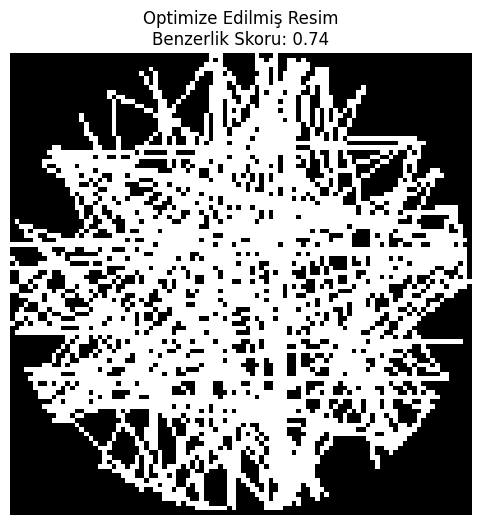

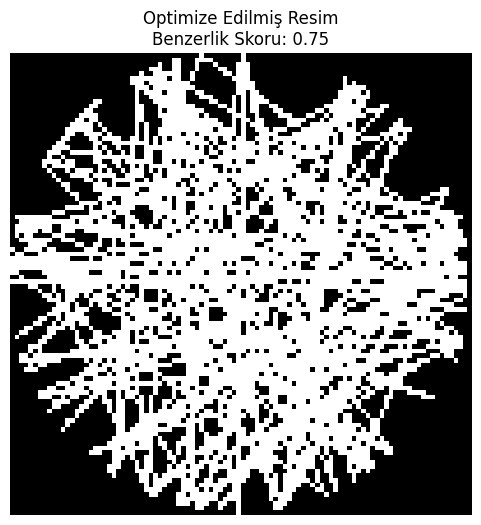

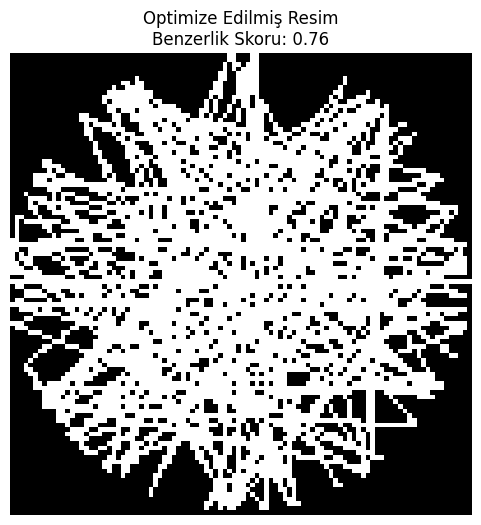

En İyi Hiperparametreler ve Benzerlik Skoru:
{'Population Size': 300, 'Mutation Rate': 0.05, 'Best Similarity Score': 0.7611}


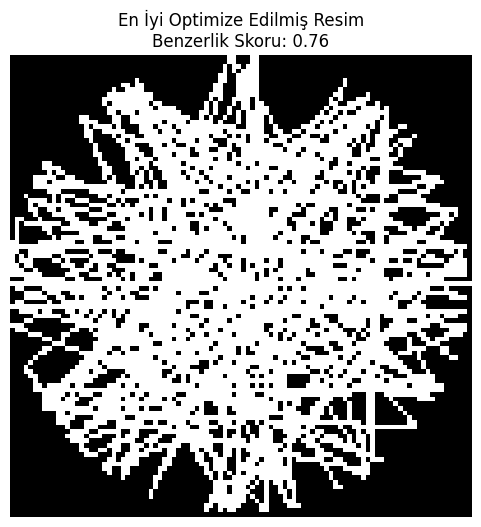

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_circle_points(num_points):
    """
    Bir çember üzerinde belirli sayıda nokta oluşturur.
    """
    circle_points = []
    for i in range(num_points):
        angle = 2 * np.pi * i / num_points
        x = np.cos(angle)
        y = np.sin(angle)
        circle_points.append((x, y))
    return circle_points

def draw_image(circle_points, sequence):
    """
    Verilen bir dizi noktalar arasında çizgi çekerek bir resim oluşturur.
    """
    image = np.zeros((100, 100))  # 100x100 boyutunda siyah bir resim oluştur
    for i in range(len(sequence) - 1):
        start_point = circle_points[sequence[i] - 1]
        end_point = circle_points[sequence[i + 1] - 1]
        x0, y0 = start_point
        x1, y1 = end_point
        x_values = np.linspace(x0, x1, 100)
        y_values = np.linspace(y0, y1, 100)
        for x, y in zip(x_values, y_values):
            x_index = int((x + 1) * (image.shape[1] - 1) / 2)
            y_index = int((y + 1) * (image.shape[0] - 1) / 2)
            image[y_index, x_index] = 1
    return image

def similarity_score(original_image, generated_image):
    """
    İki resim arasındaki benzerliği hesaplar.
    """
    return np.sum(original_image == generated_image) / original_image.size

# Genetik Algoritma Fonksiyonlarını Tanımlama
def initialize_population(population_size, sequence_length):
    """
    Başlangıç popülasyonunu rastgele oluşturur.
    """
    return np.random.randint(1, 361, size=(population_size, sequence_length))

def evaluate_population(population, circle_points, original_image):
    """
    Popülasyonun uygunluk değerlerini hesaplar.
    """
    scores = []
    for individual in population:
        image = draw_image(circle_points, individual)
        score = similarity_score(original_image, image)
        scores.append(score)
    return np.array(scores)

def select_parents(population, scores, num_parents):
    """
    Ebeveynleri seçer.
    """
    parents_indices = np.argsort(scores)[-num_parents:]
    return population[parents_indices]

def crossover(parents, offspring_size):
    """
    Çaprazlama işlemi gerçekleştirir.
    """
    offspring = np.empty(offspring_size)
    crossover_point = np.random.randint(1, offspring_size[1])
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k+1) % parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutate(offspring_crossover, mutation_rate):
    """
    Mutasyon işlemi gerçekleştirir.
    """
    for idx in range(offspring_crossover.shape[0]):
        for gene in range(offspring_crossover.shape[1]):
            if np.random.uniform(0, 1) < mutation_rate:
                offspring_crossover[idx, gene] = np.random.randint(1, 361)
    return offspring_crossover

def genetic_algorithm(population_size, sequence_length, circle_points, original_image, num_generations, num_parents, mutation_rate):
    """
    Genetik algoritmayı uygular ve en iyi çözümü döndürür.
    """
    population = initialize_population(population_size, sequence_length)
    for generation in range(num_generations):
        scores = evaluate_population(population, circle_points, original_image)
        parents = select_parents(population, scores, num_parents)
        offspring_crossover = crossover(parents, offspring_size=(population_size-num_parents, sequence_length))
        offspring_mutation = mutate(offspring_crossover, mutation_rate)
        population[0:num_parents, :] = parents
        population[num_parents:, :] = offspring_mutation
    final_scores = evaluate_population(population, circle_points, original_image)
    best_individual = population[np.argmax(final_scores)]
    return best_individual

# Orijinal Resmi Yükleme ve Siyah-Beyaz Dönüşümü
def create_black_white_image():
    """
    Siyah bir zemin üzerine beyaz bir daire çizerek bir siyah-beyaz resim oluşturur.
    """
    image = np.zeros((100, 100))
    center = (50, 50)
    radius = 40
    for i in range(100):
        for j in range(100):
            if (i - center[0])**2 + (j - center[1])**2 <= radius**2:
                image[i, j] = 1
    return image

# Orijinal resmi oluştur
original_image = create_black_white_image()

# Çözüm uzunluğu
sequence_length = 100

# Hiperparametre Denemeleri
population_sizes = [100, 200, 300]
mutation_rates = [0.05, 0.1, 0.2]

best_similarity = 0
best_hyperparameters = {}

for population_size in population_sizes:
    for mutation_rate in mutation_rates:
        # Genetik Algoritmayı Çalıştırma
        best_individual = genetic_algorithm(population_size, sequence_length, circle_points, original_image, num_generations, num_parents, mutation_rate)

        # Optimize Edilmiş Resmi Oluşturma
        optimized_image = draw_image(circle_points, best_individual)

        # Benzerlik Skorunu Hesaplama
        similarity = similarity_score(original_image, optimized_image)

        # En İyi Benzerlik Skorunu Güncelleme
        if similarity > best_similarity:
            best_similarity = similarity
            best_hyperparameters['Population Size'] = population_size
            best_hyperparameters['Mutation Rate'] = mutation_rate
            best_hyperparameters['Best Similarity Score'] = best_similarity
            best_optimized_image = optimized_image

            # Sonuçları Görselleştirme
            plt.figure(figsize=(6, 6))
            plt.title('Optimize Edilmiş Resim\nBenzerlik Skoru: {:.2f}'.format(similarity))
            plt.imshow(optimized_image, cmap='gray')
            plt.axis('off')
            plt.show()

# En İyi Hiperparametreleri ve Benzerlik Skorunu Yazdırma
print("En İyi Hiperparametreler ve Benzerlik Skoru:")
print(best_hyperparameters)

# En İyi Optimize Edilmiş Resmi Görselleştirme
plt.figure(figsize=(6, 6))
plt.title('En İyi Optimize Edilmiş Resim\nBenzerlik Skoru: {:.2f}'.format(best_similarity))
plt.imshow(best_optimized_image, cmap='gray')
plt.axis('off')
plt.show()

Diğer Hiper Parametreler Sabit Tutularak Popülasyon Boyutunun Değişiminin Başarıma Etki Grafiğinin Çizdirilmesi:



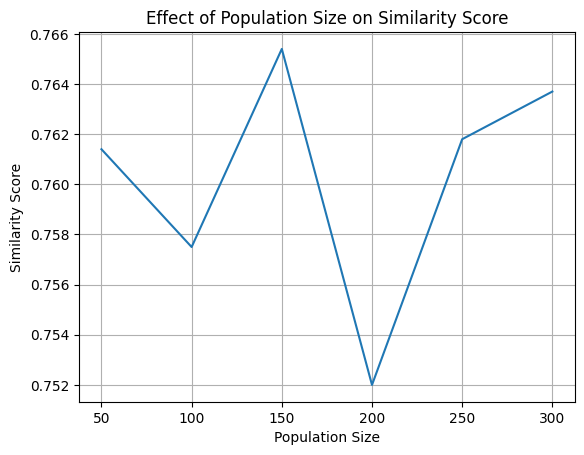

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_circle_points(num_points):
    """
    Bir çember üzerinde belirli sayıda nokta oluşturur.
    """
    circle_points = []
    for i in range(num_points):
        angle = 2 * np.pi * i / num_points
        x = np.cos(angle)
        y = np.sin(angle)
        circle_points.append((x, y))
    return circle_points

def draw_image(circle_points, sequence):
    """
    Verilen bir dizi noktalar arasında çizgi çekerek bir resim oluşturur.
    """
    image = np.zeros((100, 100))  # 100x100 boyutunda siyah bir resim oluştur
    for i in range(len(sequence) - 1):
        start_point = circle_points[sequence[i] - 1]
        end_point = circle_points[sequence[i + 1] - 1]
        x0, y0 = start_point
        x1, y1 = end_point
        x_values = np.linspace(x0, x1, 100)
        y_values = np.linspace(y0, y1, 100)
        for x, y in zip(x_values, y_values):
            x_index = int((x + 1) * (image.shape[1] - 1) / 2)
            y_index = int((y + 1) * (image.shape[0] - 1) / 2)
            image[y_index, x_index] = 1
    return image

def similarity_score(original_image, generated_image):
    """
    İki resim arasındaki benzerliği hesaplar.
    """
    return np.sum(original_image == generated_image) / original_image.size

# Genetik Algoritma Fonksiyonlarını Tanımlama
def initialize_population(population_size, sequence_length):
    """
    Başlangıç popülasyonunu rastgele oluşturur.
    """
    return np.random.randint(1, 361, size=(population_size, sequence_length))

def evaluate_population(population, circle_points, original_image):
    """
    Popülasyonun uygunluk değerlerini hesaplar.
    """
    scores = []
    for individual in population:
        image = draw_image(circle_points, individual)
        score = similarity_score(original_image, image)
        scores.append(score)
    return np.array(scores)

def select_parents(population, scores, num_parents):
    """
    Ebeveynleri seçer.
    """
    parents_indices = np.argsort(scores)[-num_parents:]
    return population[parents_indices]

def crossover(parents, offspring_size):
    """
    Çaprazlama işlemi gerçekleştirir.
    """
    offspring = np.empty(offspring_size)
    crossover_point = np.random.randint(1, offspring_size[1])
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k+1) % parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutate(offspring_crossover, mutation_rate):
    """
    Mutasyon işlemi gerçekleştirir.
    """
    for idx in range(offspring_crossover.shape[0]):
        for gene in range(offspring_crossover.shape[1]):
            if np.random.uniform(0, 1) < mutation_rate:
                offspring_crossover[idx, gene] = np.random.randint(1, 361)
    return offspring_crossover

def genetic_algorithm(param_values, population_size_fixed, sequence_length, circle_points, original_image, num_generations, num_parents, mutation_rate):
    """
    Genetik algoritmayı uygular ve hiperparametrelerin benzerlik skorlarına etkisini görselleştirir.
    """
    similarity_scores = []
    for param_value in param_values:
        _, similarity = genetic_algorithm_helper(population_size_fixed, sequence_length, circle_points, original_image, num_generations, num_parents, mutation_rate)
        similarity_scores.append(similarity)

    # Hiperparametre değişimine göre benzerlik oranlarını çizdir
    plt.plot(param_values, similarity_scores)
    plt.xlabel('Population Size')
    plt.ylabel('Similarity Score')
    plt.title('Effect of Population Size on Similarity Score')
    plt.grid(True)
    plt.show()

def genetic_algorithm_helper(population_size, sequence_length, circle_points, original_image, num_generations, num_parents, mutation_rate):
    """
    Genetik algoritmayı uygular ve en iyi çözümü ve benzerlik puanını döndürür.
    """
    population = initialize_population(population_size, sequence_length)
    for generation in range(num_generations):
        scores = evaluate_population(population, circle_points, original_image)
        parents = select_parents(population, scores, num_parents)
        offspring_crossover = crossover(parents, offspring_size=(population_size-num_parents, sequence_length))
        offspring_mutation = mutate(offspring_crossover, mutation_rate)
        population[0:num_parents, :] = parents
        population[num_parents:, :] = offspring_mutation
    final_scores = evaluate_population(population, circle_points, original_image)
    best_individual = population[np.argmax(final_scores)]
    return best_individual, np.max(final_scores)

# Orijinal Resmi Yükleme ve Siyah-Beyaz Dönüşümü
def create_black_white_image():
    """
    Siyah bir zemin üzerine beyaz bir daire çizerek bir siyah-beyaz resim oluşturur.
    """
    image = np.zeros((100, 100))
    center = (50, 50)
    radius = 40
    for i in range(100):
        for j in range(100):
            if (i - center[0])**2 + (j - center[1])**2 <= radius**2:
                image[i, j] = 1
    return image

# Orijinal resmi oluştur
original_image = create_black_white_image()

# Çözüm uzunluğu
sequence_length = 100

# Hiperparametrelerin Sabit Değerleri
num_generations = 100
num_parents = 20
mutation_rate = 0.02

# Değişen Hiperparametre Değerleri
param_values = [50, 100, 150, 200, 250, 300]

# Genetik Algoritmayı Çalıştırma ve Grafik Çizdirme
genetic_algorithm(param_values, population_size, sequence_length, create_circle_points(360), original_image, num_generations, num_parents, mutation_rate)